In [1]:
#%pip install cartopy    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


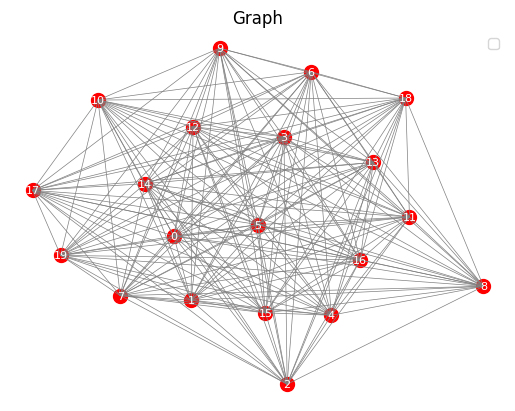

In [2]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

        
# cities = [
#     "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
#     "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
#     "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
#     "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
#     "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
#     "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
#     "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
#     "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
# ]
# cities = ["Rouen", "Saint-Etienne-Du-Rouvray","Mont-Saint-Aignan", "Bonsecours"]

# cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
# cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]
#create real graph
# graph = MapGraph(cities=cities,start_city="Rouen")
graph = RandomGraph(node_number=20,min_weight=1,max_weight=100)
graph.plot_graph()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Removed 0 edges of 190
Costed 0 edges of 190


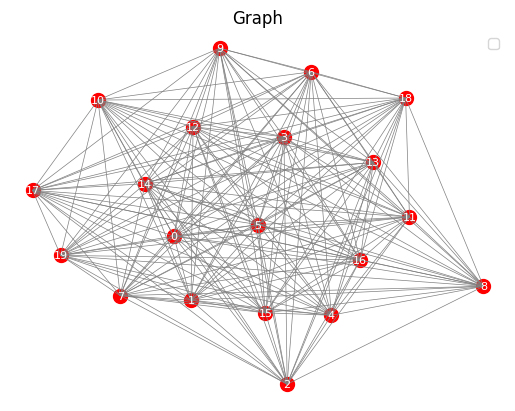

In [3]:
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

graph.plot_graph()

Algorithm ACO : 200 ants, 1 vehicule : 



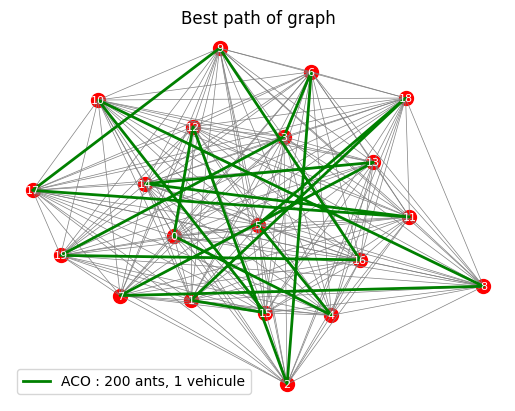

Best paths: [[0, 4, 5, 18, 1, 15, 10, 8, 7, 13, 14, 11, 17, 9, 16, 19, 3, 6, 2, 12, 0]]
Total distance: 291.6815898907126
Distance per vehicles  : [291.6815898907126]
Average distance for each vehicles : 291.6815898907126
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 35
Total number of iterations : 85
Algorithm ACO : 200 ants, 2 vehicule : 



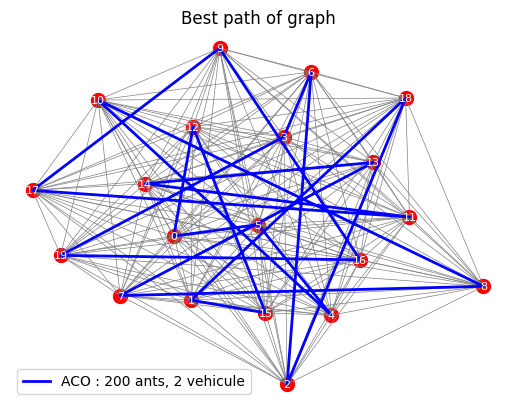

Best paths: [[0, 5, 4, 10, 8, 7, 13, 14, 11, 17, 9, 16, 19, 3, 6, 2, 18, 1, 15, 12, 0]]
Total distance: 320.5113270274327
Distance per vehicles  : [320.5113270274327]
Average distance for each vehicles : 320.5113270274327
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 27
Total number of iterations : 77


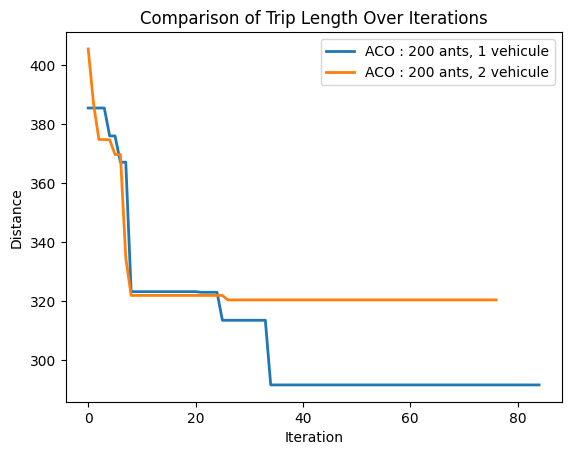

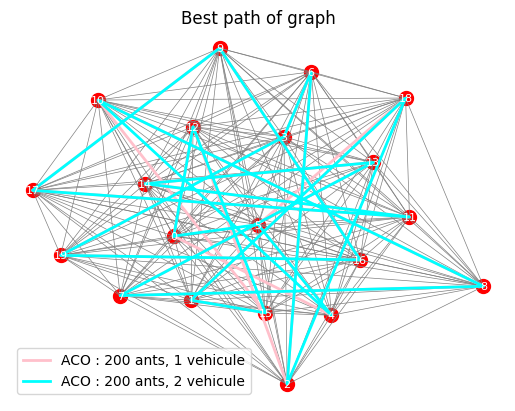

In [ ]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Distance per vehicles  : {algorithm.distance_per_vehicles}")
    print(f"Average distance for each vehicles : {algorithm.distance_average_per_vehicles}")
    print(f"Standard deviation distance for each vehicles : {algorithm.distance_standard_deviation_per_vehicles}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        run_algorithm(graph,algorithm)
    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 0
max_iterations = 1000
convergence_threshold = 50
# GREEDY0 = GreedyAlgo(graph=graph, name="GREEDY : 1 vehicles", num_vehicles=1, min_iterations=min_iterations, max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# GREEDY = GreedyAlgo(graph=graph, name="GREEDY : 2 vehicles", num_vehicles=2, min_iterations=min_iterations, max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO0 = AcoAlgo(graph=graph, name="ACO : 200 ants, decay=0.7, alpha=0.5", num_ants=200, num_vehicles=1,decay=0.7, alpha=0.5, beta = 2.0, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO1 = AcoAlgo(graph=graph, name="ACO : 200 ants, decay=0.95, alpha=0.3", num_ants=200, num_vehicles=1,decay=0.95, alpha=0.3, beta = 2.0, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [ACO0,ACO1]
run_algorithms(graph= graph,algorithms=algorithms)
